<a href="https://colab.research.google.com/github/idrkhowto/SPIDERS-Project-Datatype-Conversion-Creat-and-Check-Dataset/blob/main/_Datatype_Conversion_Create_and_Check_Dataset_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# im importing more things cause I keep getting warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

In [ ]:
#Incorrect packages - they do not allow the query to be run

from astropy.cosmology import Cosmology
!pip install astropy
!pip install --pre astroquery
#!pip install astroquery
import matplotlib

import sys

#Import packages
from astropy.io import fits
from astropy import units
from astropy.table import Table
import numpy as np, pandas as pd

#Astroquery is what we use to download data from SDSS
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy import constants as const

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

import pickle
pickle.HIGHEST_PROTOCOL = 4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
#already installed
#Import packages
#from astropy.io import fits
#from astropy import units
#from astropy.table import Table
#import numpy as np, pandas as pd


#!pip install --pre astroquery

#Astroquery is what we use to download data from SDSS
#from astropy.coordinates import SkyCoord
#from astroquery.sdss import SDSS
#from astropy import constants as const

#from astropy.cosmology import FlatLambdaCDM
#cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

#import pickle
#pickle.HIGHEST_PROTOCOL = 4

In [ ]:
#my attempt at mounting the drive again, since the name changed and I do not know how to fix the file path
from astropy.table import Table
import pandas as pd
import os

# Mount shared drive
from google.colab import drive
drive.mount('/content/drive')
shared_drive = 'SPIDERS_Project'
drive_dir = '/content/drive/Shared drives/' + shared_drive

# Load cluster and BCG data from RASS 
cluster_path = os.path.join(drive_dir, 'Data', 'catCluster-SPIDERS_RASS_CLUS-v3.0.fits')
bcg_path = os.path.join(drive_dir, 'Data', 'SpidersXclusterBCGs-v2.0.fits')
Cluster_data = Table.read(cluster_path).to_pandas()
BCG_data = Table.read(bcg_path).to_pandas()

# Join data, so only use clusters for which we also have Brightest Cluster Galacy (BCG) data
Joined_data = pd.merge(Cluster_data, BCG_data, on='CLUS_ID', how='inner')

Mounted at /content/drive


# Load existing Data

In [ ]:
#I think i fixed this so that we do not have to use this piece of code anymore
#Load cluster and BCG data from RASS 

Cluster_data = Table(fits.open('/content/drive/Shared drives/SPIDERS_Project_drive/Data/catCluster-SPIDERS_RASS_CLUS-v3.0.fits')[1].data).to_pandas()
BCG_data     = Table(fits.open('/content/drive/Shared drives/SPIDERS_Project_drive/Data/SpidersXclusterBCGs-v2.0.fits')[1].data).to_pandas()

#Join data, so only use clusters for which we also have Brightest Cluster Galacy (BCG) data
Joined_data = pd.merge(Cluster_data, BCG_data, on = 'CLUS_ID', how = 'inner')

In [ ]:
#take in a list of redshift, return a list of redshift in arcsec / megaparsec
#def redshift_in_arcsec_mpc(redshift_ls):
 #   return cosmo.arcsec_per_kpc_proper(redshift_ls)*1000*units.kpc/units.mpc


#Setup Coordinates for the BCG/clusters
#coord = SkyCoord(Joined_data['RA'], Joined_data['DEC'], unit='deg')
#rads = redshift_in_arcsec_mpc(Joined_data['CLUZSPEC'])
#radius = 2*units.mpc # Claire's original value of 2 proper Mpc

In [ ]:
# my attempt at fixing the code above
#take in a list of redshift, return a list of redshift in arcsec / megaparsec
def redshift_in_arcsec_mpc(redshift_ls):
    return cosmo.arcsec_per_kpc_proper(redshift_ls)*1000*units.kpc/units.mpc

#Setup Coordinates for the BCG/clusters
coord = SkyCoord(Joined_data['RA'], Joined_data['DEC'], unit='deg')
rads = redshift_in_arcsec_mpc(Joined_data['CLUZSPEC'].values) # Use .values to extract the NumPy array
radius = 2*units.mpc 

In [ ]:
print(len(Joined_data))
array = np.zeros(len(Joined_data))
for j in range (0, len(Joined_data)):
  x = Joined_data['R200C_DEG'].values[j] * 60
  array[j] = x
print(min(array))
print(Joined_data)

433
3.048
        CLUS_ID  NCOMPONENT   CODEX          RA        DEC      RA_OPT  \
0    b'1_1172 '           1   12366  119.919470  54.009942  119.918939   
1    b'1_11970'           1   36931  339.572790  26.626060  339.575473   
2    b'1_1198 '           1   12406  124.990930  56.591922  124.976943   
3    b'1_11985'           1   36947  336.728890  25.843802  336.732858   
4    b'1_12054'           1   37031  342.543330  26.642340  342.531099   
..          ...         ...     ...         ...        ...         ...   
428  b'2_5864 '           1  220063  198.559350  41.391904  198.576087   
429  b'2_5977 '           1  220176  205.659170  39.590621  205.653544   
430  b'2_8752 '           1  225552    2.485571  25.883837    2.518669   
431  b'2_8768 '           1  225568   10.123288  29.559328   10.117816   
432  b'2_8798 '           1  225598    6.961159  26.277598    6.940734   

       DEC_OPT  LAMBDA_CHISQ_OPT  Z_LAMBDA  Z_LAMBDA_ERR  ...  \
0    54.006464         34.907593  0.

In [ ]:
import matplotlib.pyplot as plt

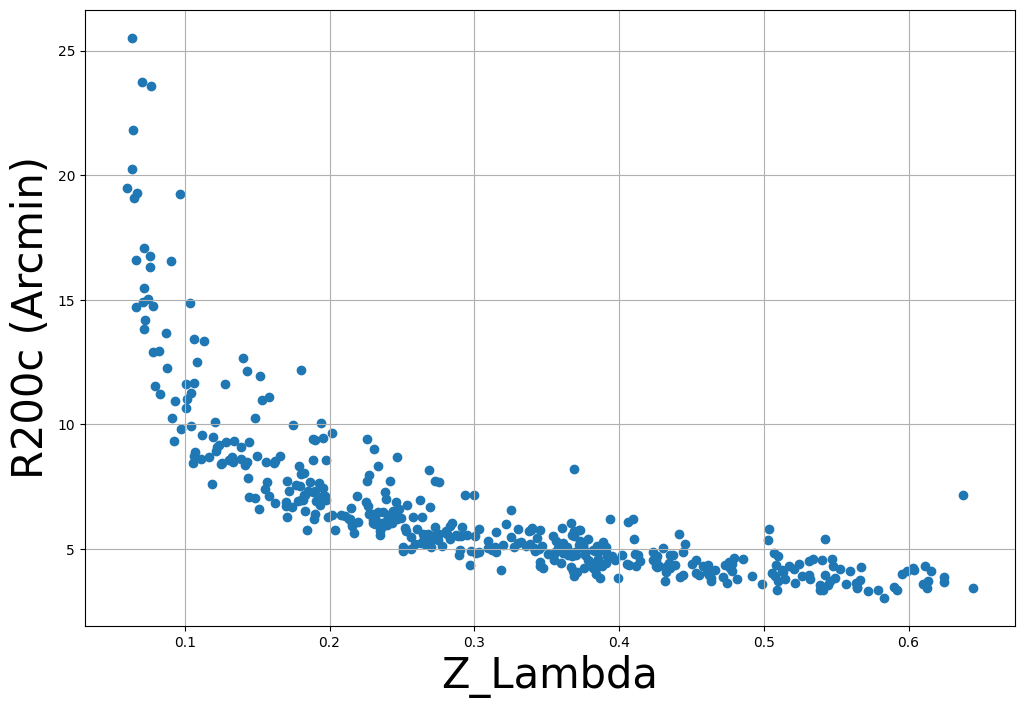

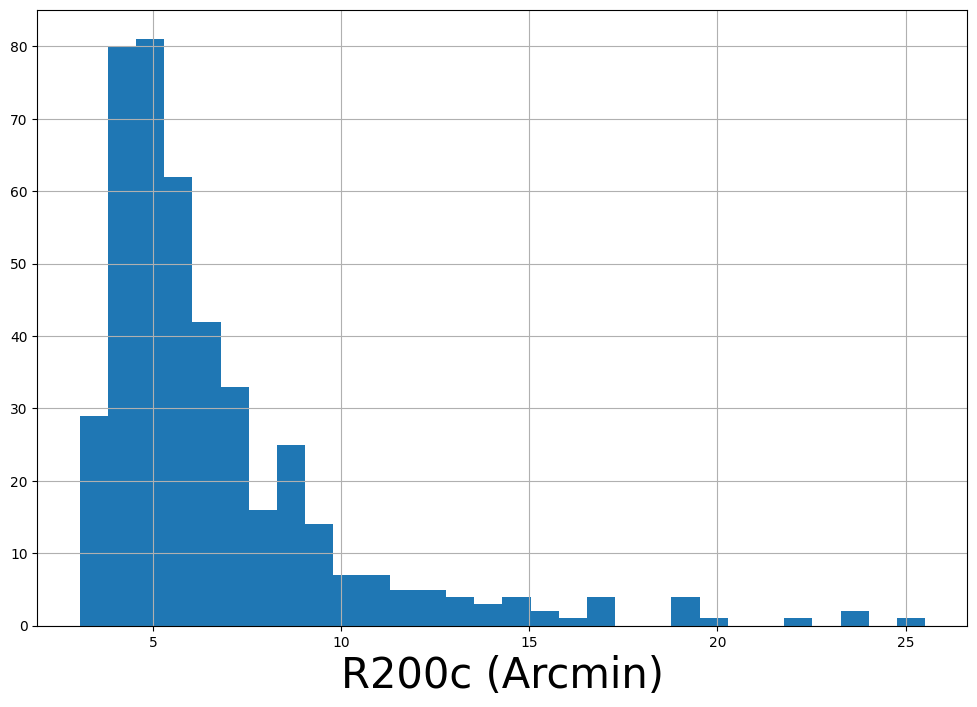

Average Radius: 6.670586605080832    Smallest Radius: 3.048    Largest Radius: 25.518


In [ ]:
#Plot of R200c_DEG vs. Cluster_z and Histogram of R200c_DEG values

plt.figure(figsize=(12,8))
plt.grid()
#plt.yscale('log')

#plt.ylim((0,5))
#plt.hist(Joined_data['R200C_DEG']*60, bins=50)
plt.scatter(Joined_data.Z_LAMBDA, Joined_data['R200C_DEG'].values*60)

plt.xlabel('Z_Lambda', size = 30)
plt.ylabel('R200c (Arcmin)', size = 30)


plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('R200c (Arcmin)', size = 30)
plt.hist(Joined_data['R200C_DEG'].values*60, bins=30)
plt.show()

print("Average Radius:", np.mean(Joined_data['R200C_DEG'].values*60), "   Smallest Radius:", np.min(Joined_data['R200C_DEG'].values*60), "   Largest Radius:", np.max(Joined_data['R200C_DEG'].values*60))

# Download data from SDSS

In [ ]:
#original query
#j=0

#result = SDSS.query_region(coord[j], #Coordinate of the cluster
      #                         spectro = True, #Only select galaxies with spectroscopic info
      #                       radius = 3 * units.deg, #Galaxies within R200c
      #                        specobj_fields=['ra', 'dec', 'specobjid', 'z', 'zErr', 'zWarning'], 
      #                        photoobj_fields = ['cModelMag_r', 'cModelMagErr_r', 'flags_r', 'extinction_r',
      #                                           'cModelMag_g', 'cModelMagErr_g', 'flags_g', 'extinction_g',
      #                                           'cModelMag_i', 'cModelMagErr_i', 'flags_i', 'extinction_i',
      #                                           'cModelMag_z', 'cModelMagErr_z', 'flags_z', 'extinction_z'])

In [ ]:
aim_points = []
for c in coord:
    try:
        result = SDSS.query_region(c, spectro=True, radius= 3* units.degree,  #Galaxies withing R200c - still have no idea what that means in this query but oh well
                                     specobj_fields = ['ra', 'dec', 'specobjid', 'z', 'zErr', 'zWarning' ],
                                     photoobj_fields=['cModelMag_r','cModelMagErr_r','flags_r','extinction_r','cModelMag_g', 'cModelMagErr_g', 'flags_g', 'extinction_g', 'cModelMag_i', 'cModelMagErr_i', 'flags_i', 'extinction_i', 'cModelMag_z', 'cModelMagErr_z', 'flags_z', 'extinciton_z'])
        data = Table(result)
        aim_point = SkyCoord(np.mean(data['ra']), np.mean(data['dec']), unit=(u.deg, u.deg))
        aim_points.append(aim_point)
    except:
        print(f"No results for {c}")


No results for <SkyCoord (ICRS): (ra, dec) in deg
    (119.91947, 54.009942)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (339.57279, 26.62606)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (124.99093, 56.591922)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (336.72889, 25.843802)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (342.54333, 26.64234)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (124.66834, 54.565153)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (0.32061167, 21.545825)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (2.6225639, 20.792385)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (120.89053, 54.321747)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (7.0030021, 24.808076)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (10.961069, 24.400824)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (10.901455, 20.655132)>
No results for <SkyCoord (ICRS): (ra, dec) in deg
    (11.652428,



*   nested loop inside query to check for 3 arcmin radius
*   make list of aim points for cluster
*   make function instead of list that returns temp[i] = result[i]




In [ ]:
#defining galaxy data outside query
Galaxy_data = []
#Loop over each cluster in the RASS dataset
for j in range(len(Joined_data)):

    #For each cluster, select all objects within 0.5*R200c of the cluster
    radius = min(Joined_data['R200C_DEG'].values[j]*units.deg,3*units.arcmin)


    
    result = SDSS.query_region(coord[j], #Coordinate of the cluster
                               spectro=True, #Only select galaxies with spectroscopic info
                               radius=radius, #Galaxies within 0.5*R200c
                               specobj_fields=['ra', 'dec', 'specobjid', 'z', 'zErr', 'zWarning'], 
                               photoobj_fields=['cModelMag_r', 'cModelMagErr_r', 'flags_r', 'extinction_r',
                                                'cModelMag_g', 'cModelMagErr_g', 'flags_g', 'extinction_g',
                                                'cModelMag_i', 'cModelMagErr_i', 'flags_i', 'extinction_i',
                                                'cModelMag_z', 'cModelMagErr_z', 'flags_z', 'extinction_z']).to_pandas()
    
    # If query returns some galaxies run following code
    if(not result.empty):
        
        #Peculiar velocities of the galaxies obtained using the redshift of the galaxies (w.r.t cluster/BCG)
        pv = const.c*(1/1000)*(result['z'] - Joined_data.loc[j, 'CLUZSPEC'])/(1 + Joined_data.loc[j, 'CLUZSPEC'])
        
        #Coordinates of the galaxy
        gal_coord = SkyCoord(result['ra'], result['dec'], unit='deg')
        
        #Get separation between galaxies and BCG's center
        sep = gal_coord.separation(coord[j]).deg
        
        #Create a dataframe to store satellite galaxy data of this cluster
        temp = pd.DataFrame()
        temp['ra']         = result['ra']
        temp['dec']        = result['dec']
        temp['specobjid']  = result['specobjid']
        temp['LAMBDA']     = Joined_data.loc[j, 'LAMBDA_CHISQ_OPT']
        temp['Cluster_ID'] = Joined_data.loc[j, 'CLUS_ID']
        temp['Cluster_z']  = Joined_data.loc[j, 'CLUZSPEC']
        temp['Galaxy_z']   = result['z']
        temp['zErr']       = result['zErr']
        temp['zWarning']   = result['zWarning']
        temp['vel']        = pv     
        temp['sep']        = sep
        temp['R200c']      = Joined_data.loc[j, 'R200C_DEG']
        
        for i in ['cModelMag_r', 'cModelMagErr_r', 'flags_r', 'extinction_r','cModelMag_g', 'cModelMagErr_g', 'flags_g', 'extinction_g','cModelMag_i', 'cModelMagErr_i', 'flags_i', 'extinction_i','cModelMag_z', 'cModelMagErr_z', 'flags_z', 'extinction_z']:
               temp[i] = result[i]
        #Append dataframe to a list
        Galaxy_data.append(temp)
        
#Concatenate the list to get one big dataframe containing all galaxies from all clusters
Galaxy_data = pd.concat(Galaxy_data, ignore_index=True)


NameError: ignored

In [ ]:
Galaxy_data = []

#Loop over each cluster in the RASS dataset
for j in range(len(Joined_data)):

    #For each cluster, select all objects within 0.5*R200c of the cluster
    
    radius = Joined_data['R200C_DEG'].values[j]*0.5*u.deg
    
    result = SDSS.query_region(coord[j], #Coordinate of the cluster
                               spectro=True, #Only select galaxies with spectroscopic info
                               radius=radius, #Galaxies within 0.5*R200c
                               specobj_fields=['ra', 'dec', 'specobjid', 'z', 'zErr', 'zWarning'], 
                               photoobj_fields=['cModelMag_r', 'cModelMagErr_r', 'flags_r', 'extinction_r',
                                                'cModelMag_g', 'cModelMagErr_g', 'flags_g', 'extinction_g',
                                                'cModelMag_i', 'cModelMagErr_i', 'flags_i', 'extinction_i',
                                                'cModelMag_z', 'cModelMagErr_z', 'flags_z', 'extinction_z'])
    
    # If query returns some galaxies run following code
    if(result):
        
        #Peculiar velocities of the galaxies obtained using the redshift of the galaxies (w.r.t cluster/BCG)
        pv = const.c*(1/1000)*(result['z'] - Joined_data.loc[j, 'CLUZSPEC'])/(1 + Joined_data.loc[j, 'CLUZSPEC'])
        
        #Coordinates of the galaxy
        gal_coord = SkyCoord(result['ra'], result['dec'], unit='deg')
        
        #Get separation between galaxies and BCG's center
        sep = gal_coord.separation(coord[j]).deg
        
        #Create a dataframe to store satellite galaxy data of this cluster
        temp = pd.DataFrame()
        temp['ra']         = result['ra']
        temp['dec']        = result['dec']
        temp['specobjid']  = result['specobjid']
        temp['LAMBDA']     = Joined_data.loc[j, 'LAMBDA_CHISQ_OPT']
        temp['Cluster_ID'] = Joined_data.loc[j, 'CLUS_ID']
        temp['Cluster_z']  = Joined_data.loc[j, 'CLUZSPEC']
        temp['Galaxy_z']   = result['z']
        temp['zErr']       = result['zErr']
        temp['zWarning']   = result['zWarning']
        temp['vel']        = pv.value      
        temp['sep']        = sep
        temp['R200c']      = Joined_data.loc[j, 'R200C_DEG']
        
        for i in ['cModelMag_r', 'cModelMagErr_r', 'flags_r', 'extinction_r',                   'cModelMag_g', 'cModelMagErr_g', 'flags_g', 'extinction_g',                  'cModelMag_i', 'cModelMagErr_i', 'flags_i', 'extinction_i',                  'cModelMag_z', 'cModelMagErr_z', 'flags_z', 'extinction_z']:
         temp[i] = result[i]
        Galaxy_data.append(temp)
        
Galaxy_data = pd.concat(Galaxy_data, ignore_index=True)


ValueError: ignored

# **ORIGINAL QUERY BELOW DO NOT MODIFY**

In [ ]:
#List to hold galaxy data
Galaxy_data = []

#Loop over each cluster in the RASS dataset
for j in range(len(Joined_data)):

    #For each cluster, select all objects within 2*R200c of the cluster
    
    result = SDSS.query_region(coord[j], #Coordinate of the cluster
                               spectro = True, #Only select galaxies with spectroscopic info
                               radius = Joined_data['R200C_DEG'].values[j]*units.deg, #Galaxies within R200c
                               specobj_fields=['ra', 'dec', 'specobjid', 'z', 'zErr', 'zWarning'], 
                               photoobj_fields = ['cModelMag_r', 'cModelMagErr_r', 'flags_r', 'extinction_r',
                                                  'cModelMag_g', 'cModelMagErr_g', 'flags_g', 'extinction_g',
                                                  'cModelMag_i', 'cModelMagErr_i', 'flags_i', 'extinction_i',
                                                  'cModelMag_z', 'cModelMagErr_z', 'flags_z', 'extinction_z'])
    
    # If query returns some galaxies run following code
    if(result):
        
        #Peculiar velocities of the galaxies obtained using the redshift of the galaxies (w.r.t cluster/BCG)
        pv = const.c*(1/1000)*(result['z'] - Joined_data.loc[j, 'CLUZSPEC'])/(1 + Joined_data.loc[j, 'CLUZSPEC'])
        
        #Coordinates of the galaxy
        gal_coord = SkyCoord(result['ra'], result['dec'], unit='deg')
        
        #Get separation between galaxies and BCG's center
        sep = gal_coord.separation(coord[j]).deg
        
        #Create a dataframe to store satellite galaxy data of this cluster
        temp = pd.DataFrame()
        temp['ra']         = result['ra']
        temp['dec']        = result['dec']
        temp['specobjid']  = result['specobjid']
        temp['LAMBDA']     = Joined_data.loc[j, 'LAMBDA_CHISQ_OPT']
        temp['Cluster_ID'] = Joined_data.loc[j, 'CLUS_ID']
        temp['Cluster_z']  = Joined_data.loc[j, 'CLUZSPEC']
        temp['Galaxy_z']   = result['z']
        temp['zErr']       = result['zErr']
        temp['zWarning']   = result['zWarning']
        temp['vel']        = pv.value      
        temp['sep']        = sep
        temp['R200c']      = Joined_data.loc[j, 'R200C_DEG']
        
        for i in ['cModelMag_r', 'cModelMagErr_r', 'flags_r', 'extinction_r', 
                  'cModelMag_g', 'cModelMagErr_g', 'flags_g', 'extinction_g',
                  'cModelMag_i', 'cModelMagErr_i', 'flags_i', 'extinction_i',
                  'cModelMag_z', 'cModelMagErr_z', 'flags_z', 'extinction_z']:
            
            temp[i] = result[i]
        #Append dataframe to a list
        Galaxy_data.append(temp)
        
#Concatenate the list to get one big dataframe containing all galaxies from all clusters
Galaxy_data = pd.concat(Galaxy_data, ignore_index=True)

ValueError: ignored

# Magnitude conversion/manipulation

In [ ]:
#Correct apparent Mag_r for dust extinction
Corrected_Mag_r = Galaxy_data['cModelMag_r'] - Galaxy_data['extinction_r']

#Convert corrected apperent mag into absolute magnitude (use distance modulus)
M_r = (Corrected_Mag_r - 5*np.log10(1e6*cosmo.luminosity_distance(Galaxy_data['Galaxy_z']).value/10))



#Need g-r color for computing K-correction using cmodel magnitudes
gr = Galaxy_data['cModelMag_g'] - Galaxy_data['extinction_g'] - Galaxy_data['cModelMag_r'] + Galaxy_data['extinction_r']

#Load k-correction module from "http://kcor.sai.msu.ru/calc_kcor.py"
#This module is already in the gdrive folder
from calc_kcor import calc_kcor 

# this k-correction is not designed for z>0.6, but I'm using it for all redshifts anyway
# Need to think more about how to do this correctly
kcorr = calc_kcor('r', Galaxy_data['Galaxy_z'], 'g - r', gr)

#Employ evolution corrections and k-correction to get final Magnitude
Galaxy_data['M_r'] = M_r + 1.3*Galaxy_data['Galaxy_z'] - kcorr

# Type casting floats to ints

*  NOT IN USE



In [ ]:
#DONT RUN
#Looping through the specobjid's of Galaxy_data and type casting them to ints
#for i in range(62632):
 # Galaxy_data.Galaxy_ID.values[i] = int(Galaxy_data.Galaxy_ID.values[i]);

# Write to disk

In [ ]:
#Running below would save dataframes to a HDF5 file

#Use write mode since writing file for first time
Galaxy_data.to_hdf('Data/SPIDERS_Type_Casted_Dataset.hdf5', key = 'Galaxies', mode = 'w')

#Use append since we're adding dataset to existing hdf5 file
Joined_data = Joined_data.rename({'LAMBDA_CHISQ_OPT':'LAMBDA', 'CLUZSPEC':'Cluster_z', 'CLUS_ID':'Cluster_ID'}, axis = 1)
Joined_data.to_hdf('Data/SPIDERS_Type_Casted_Dataset.hdf5', key = 'Clusters', mode = 'a')

# Read data + plot

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8

plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

In [ ]:
#Reload datasets that we saved before
Galaxy_data  = pd.read_hdf('/content/gdrive/Shareddrives/SPIDERS_Project_Copy_Drive_Varshney/Data/SPIDERS_Dataset.hdf5', key = 'Galaxies')
Cluster_data = pd.read_hdf('/content/gdrive/Shareddrives/SPIDERS_Project_Copy_Drive_Varshney/Data/SPIDERS_Dataset.hdf5', key = 'Clusters')

In [ ]:
Galaxy_data_revised  = pd.read_hdf('/content/gdrive/Shareddrives/SPIDERS_Project_Copy_Drive_Varshney/Data/SPIDERS_Dataset_Revised.hdf5', key = 'Galaxies')
Cluster_data_revised = pd.read_hdf('/content/gdrive/Shareddrives/SPIDERS_Project_Copy_Drive_Varshney/Data/SPIDERS_Dataset_Revised.hdf5', key = 'Clusters')

### Cluster Redshift -- richness scatter plot

In [ ]:
# Cluster redshift/lambda distribution

plt.figure(figsize=(12,8))
plt.grid()
plt.yscale('log')

plt.scatter(Cluster_data.Cluster_z, Cluster_data.LAMBDA)

plt.xlabel('z', size = 40)
plt.ylabel(r'$\lambda$', size = 45)

### Galaxy redshift -- magnitude scatter plot

In [ ]:
# Cluster redshift/lambda distribution

plt.figure(figsize=(12,8))
plt.grid()

Mask = (Galaxy_data.Galaxy_z > 0.01) & (Galaxy_data.Galaxy_z < 0.65) & (Galaxy_data.M_r > - 30) & (Galaxy_data.M_r < -14)
plt.scatter(Galaxy_data.Galaxy_z[Mask], Galaxy_data.M_r[Mask], rasterized = True)

plt.xlabel('z', size = 40)
plt.ylabel(r'$M_r$', size = 30)

### Galaxy Magnitude Histogram

In [ ]:
# Cluster redshift/lambda distribution

plt.figure(figsize=(12,8))
plt.grid()

Mask = (Galaxy_data.Galaxy_z > 0.01) & (Galaxy_data.Galaxy_z < 0.65) & (Galaxy_data.M_r > - 25) & (Galaxy_data.M_r < -15)
plt.hist( Galaxy_data.M_r[Mask], bins = 100);
plt.xlabel(r'$M_r$', size = 30)
plt.ylabel(r'Counts', size = 30)

### Galaxy velocity --- Host halo richness scatter plot

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(Galaxy_data['LAMBDA'], np.abs(Galaxy_data['vel']), marker = '.', color = 'C0')
plt.yscale('symlog')
plt.xscale('log')
plt.xlabel(r'$\lambda$', fontsize=30)
plt.ylabel(r'$v_{LOS}$', fontsize=30)

lam = np.linspace(Galaxy_data.LAMBDA.min(), Galaxy_data.LAMBDA.max(), 100, endpoint = True)

# This line is the cutoff we use. Any galaxies with vel above this
# are removed from the sample
plt.plot(lam, 3e3*pow((lam/20),(0.45)), 'C1', lw = 4) # line from 10.1093

plt.show()

In [ ]:
#K_CORRECTION PLOT

import sys
sys.path.insert(0, '/content/gdrive/Shareddrives/SPIDERS_Project_Copy_Drive_Varshney')
import calc_kcor
from calc_kcor import calc_kcor
gr = Galaxy_data['cModelMag_g'] - Galaxy_data['extinction_g'] - Galaxy_data['cModelMag_r'] + Galaxy_data['extinction_r']
kcorr = calc_kcor('r', Galaxy_data['Galaxy_z'], 'g - r', gr)

k_val = []
z_Gal_k = []
M_r_val_k = []
Gal_spec_k = []
M_r_val_k_uncorrected = []

for i in range (0, len(Galaxy_data.Galaxy_z)):   
  if (Galaxy_data.Galaxy_z[i] > 0.01) & (Galaxy_data.Galaxy_z[i] < 0.65):
    z_Gal_k.append(Galaxy_data.Galaxy_z[i])
    k_val.append(kcorr[i])
    M_r_val_k.append(Galaxy_data.M_r[i])
    x = int(Galaxy_data.specobjid[i])
    Gal_spec_k.append(x)

for i in range (0, len(z_Gal_k)):
  M_r_val_k_uncorrected.append(M_r_val_k[i] + k_val[i] - 1.3*z_Gal_k[i])   

print(len(Galaxy_data.Galaxy_z))
print(len(z_Gal_k))



#Mask = (Galaxy_data.Galaxy_z > 0.01) & (Galaxy_data.Galaxy_z < 0.65)


#plt.scatter(Galaxy_data.Galaxy_z, kcorr)
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(z_Gal_k, k_val)

plt.xlabel('z', size = 40)
plt.ylabel(r'$k_{corr}$', size = 45)
#plt.yscale('symlog')


In [ ]:
#QUANTILE K_CORR PLOT

z_vals = np.linspace(0.01, 0.59, 30)
k_quants_low = []
k_quants_mid = []
k_quants_high = []
for i in range (0, len(z_vals)):
  low = z_vals[i] - 0.01
  high = z_vals[i] + 0.01
  
  k_sorter = []
  for j in range (0, len(z_Gal_k)):
    if (z_Gal_k[j] >= low) & (z_Gal_k[j] < high):
      k_sorter.append(k_val[j])
  
  quantiles_arr = [0.1, 0.5, 0.9]    
  k_quant_result = np.quantile(k_sorter, quantiles_arr)
  
  k_quants_low.append(k_quant_result[0])
  k_quants_mid.append(k_quant_result[1])
  k_quants_high.append(k_quant_result[2])

plt.figure(figsize=(12,8))
plt.grid()
k_low = plt.scatter(z_vals, k_quants_low, c='r', marker='o')  
k_mid = plt.scatter(z_vals, k_quants_mid, c='g', marker='o')
k_high = plt.scatter(z_vals, k_quants_high, c='b',marker='o')

plt.xlabel('z', size = 40)
plt.ylabel(r'$k_{corr}$', size = 45)
plt.legend((k_low, k_mid, k_high), 
           ('10th percentile', '50th percentile', 
            '90th percentile'), scatterpoints=1,
           loc='lower left', ncol=1,
           fontsize=16)
plt.show()

In [ ]:
k_high_k = []
M_r_corrected_high_k = []
M_r_uncorrected_high_k = []

for j in range (0, len(k_val)):   
  if (z_Gal_k[j] > 0.01) & (z_Gal_k[j] < 0.5) & (M_r_val_k[j] > -400):
    if (k_val[j] > 3) or (k_val[j] < -3):
        k_high_k.append(k_val[j])
        M_r_corrected_high_k.append(M_r_val_k[j])
        p = M_r_val_k[j] + k_val[j] - 1.3*z_Gal_k[j]
        M_r_uncorrected_high_k.append(p)

print(len(k_high_k))        

In [ ]:
plt.figure(figsize=(12,8))
plt.grid()

#Mask = (k_high_k < 10) & (k_high_k > -10)
plt.scatter(k_val, M_r_val_k)
#plt.scatter(k_high_k[Mask], M_r_uncorrected_high_k[Mask])

plt.xlabel('$k_{corr}$', size = 40)
plt.ylabel(r'$M_r$ (corrected)', size = 45)

#plt.xscale('symlog')
#plt.yscale('symlog')

plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.grid()

#Mask = (k_high_k < 10) & (k_high_k > -10)
plt.scatter(k_high_k, M_r_uncorrected_high_k)
#plt.scatter(k_high_k[Mask], M_r_uncorrected_high_k[Mask])

plt.xlabel('High $k_{corr}$', size = 40)
plt.ylabel(r'$M_r$ (uncorrected)', size = 45)

plt.xscale('symlog')
#plt.yscale('symlog')

plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(k_high_k, M_r_corrected_high_k)

plt.xlabel('High $k_{corr}$', size = 40)
plt.ylabel(r'$M_r$ (corrected)', size = 45)

#plt.yscale('symlog')
plt.xscale('symlog')

plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(M_r_uncorrected_high_k, M_r_corrected_high_k)

plt.xlabel('$M_r$ (uncorrected)', size = 40)
plt.ylabel(r'$M_r$ (corrected)', size = 45)

plt.plot([-14, -14], [-24, -24], 'k', lw=2)

#plt.yscale('symlog')

plt.show()

In [ ]:
count = 0
for i in range (0, len(z_Gal_k)):
  if (M_r_val_k[i] < -24):
    print(M_r_val_k[i], ",", M_r_val_k_uncorrected[i], ",", z_Gal_k[i], ",", k_val[i], ",", Gal_spec_k[i])
    count = count + 1
print("COUNT = " , count)    

In [ ]:
count = 0
for i in range (0, len(z_Gal_k)):
  if (z_Gal_k[i] > 0.01) & (z_Gal_k[i] < 0.5):
    if (k_val[i] < -3) or (k_val[i] > 3):
      print(M_r_val_k[i], ",", M_r_val_k_uncorrected[i], ",", z_Gal_k[i], ",", k_val[i], ",", Gal_spec_k[i])
      count = count + 1
print("COUNT = " , count)   